<a href="https://colab.research.google.com/github/NMtuzula/Machine-Learning-Datasets/blob/main/Project_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import
import pandas as pd

In [2]:
#load the data
df_stroke = pd.read_csv('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/healthcare-dataset-stroke-data.csv')
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#Info of the dataset
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#Indentifying duplicates and the sum
df_stroke.duplicated().sum()

0

There are no duplicate rows

In [5]:
#Identifying missing values
df_stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

I will be addressing the missing values by using a placeholder

In [6]:
#addressing num columns
num_cols = df_stroke.select_dtypes('number').columns
num_cols

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [7]:
#Filling the numeric bmi missing values with placeholder -1
df_stroke[num_cols] = df_stroke[num_cols].fillna(-1)

In [8]:
#Confirming that there are no missing values
df_stroke.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
#Dropping column 'ID'
df = df_stroke.drop(columns = 'id').copy()

In [ ]:
#Identifying inconcistencies on objects
cat_col = df_stroke.select_dtypes('object').columns

#checking for inconsistemces
for col in cat_col:
  print(f'Unique values, {col}')
  print(df_stroke[col].value_counts())

  print('\n')

Unique values, gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Unique values, ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64


Unique values, work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Unique values, Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


Unique values, smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




There are no inconsistent values on our categorical coulmns

In [10]:
#Checking for inconsistences on numeric columns
for num in num_cols:
  print(f'Unique values: {num}')
  print(df_stroke[num].value_counts())

  print('\n')

Unique values: id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64


Unique values: age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64


Unique values: hypertension
0    4612
1     498
Name: hypertension, dtype: int64


Unique values: heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64


Unique values: avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64


Unique values: bmi
-1.0     201
 28.7     41
 28.4     38
 27.6     37
 26.7     37
        ... 
 11.5      1
 40.6      1
 53.9      1
 97.6      1
 14.9      1
Name: bmi, Length: 419, dtype: int64


Unique values: stroke
0    4861
1

There seems to be no inconsistencies on the numerical columns as well.

# Vistuals

### Target

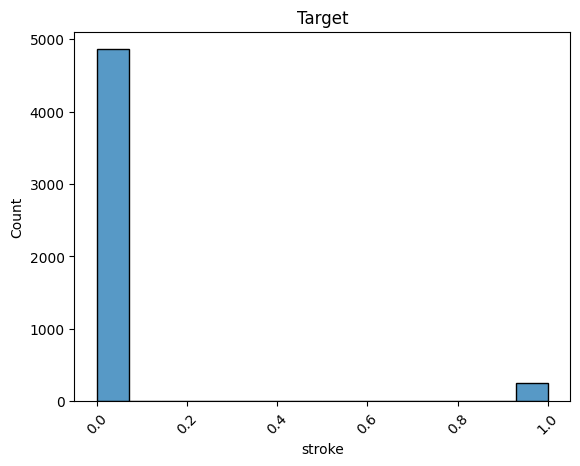

In [12]:
#Necesarry imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Visual for the target

ax = sns.histplot(data = df, x = 'stroke')
ax.tick_params(axis = 'x', rotation = 45);
ax.ticklabel_format(style = 'plain');
ax.set_title('Target');

The count of people with no stroke is more that those that were attacked by a stroke

### Features

###### Ploting categorical features using value coounts

In [23]:
# Saving the value counts for Gender
val_counts = df['gender'].value_counts()
val_counts

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

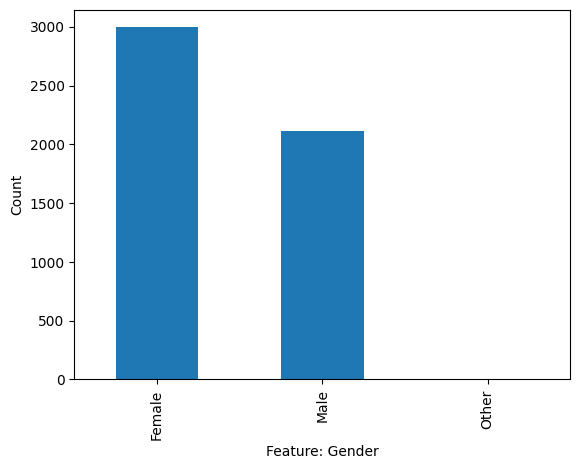

In [24]:
# Plot value counts as a bar graph
ax = val_counts.plot(kind='bar')
ax.set_ylabel("Count");
ax.set_xlabel("Feature: Gender");

There are more females than males in this dataset

In [25]:
# Saving the value counts for ever_married
val_counts = df['ever_married'].value_counts()
val_counts

Yes    3353
No     1757
Name: ever_married, dtype: int64

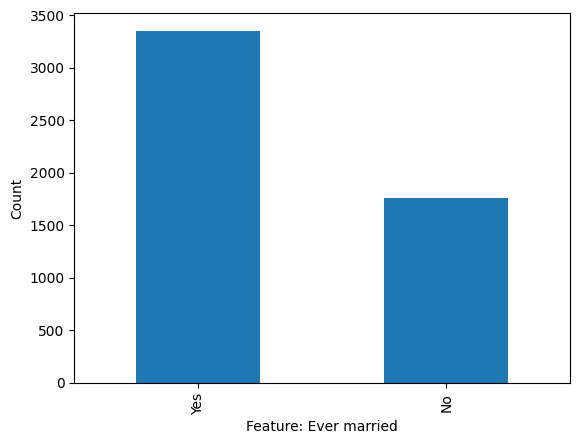

In [26]:
# Plot value counts as a bar graph
ax = val_counts.plot(kind='bar')
ax.set_ylabel("Count");
ax.set_xlabel("Feature: Ever married");

The number of perople that got married is more that those that are ever married.

In [27]:
# Saving the value counts for work_type
val_counts = df['work_type'].value_counts()
val_counts

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

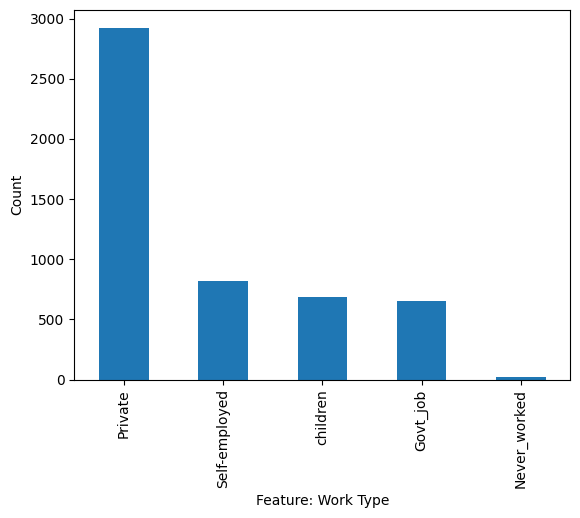

In [28]:
# Plot value counts as a bar graph
ax = val_counts.plot(kind='bar')
ax.set_ylabel("Count");
ax.set_xlabel("Feature: Work Type");

The rate of unemployment is less

In [29]:
# Saving the value counts for Residence_type
val_counts = df['Residence_type'].value_counts()
val_counts

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

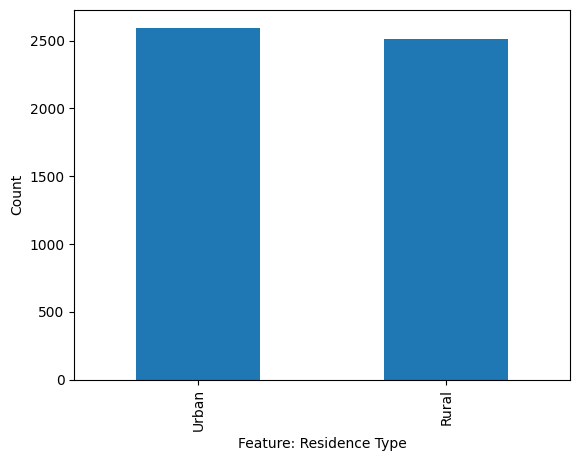

In [30]:
# Plot value counts as a bar graph
ax = val_counts.plot(kind='bar')
ax.set_ylabel("Count");
ax.set_xlabel("Feature: Residence Type");

There is a 5 - 10% difference in the residence type

In [31]:
# Saving the value counts for smoking_status
val_counts = df['smoking_status'].value_counts()
val_counts

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

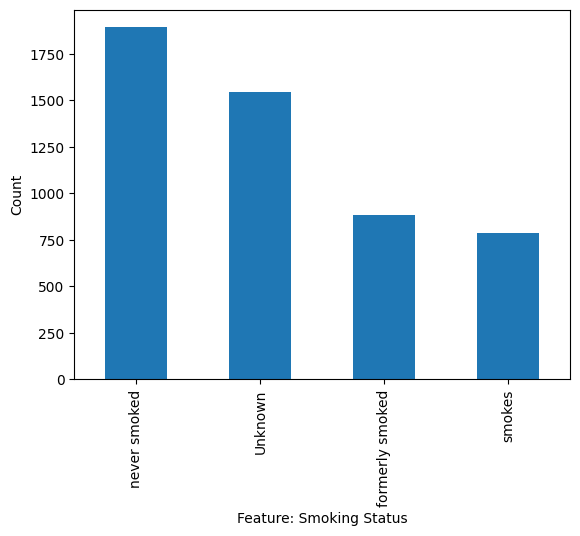

In [32]:
# Plot value counts as a bar graph
ax = val_counts.plot(kind='bar')
ax.set_ylabel("Count");
ax.set_xlabel("Feature: Smoking Status");

Most people in this dataset are smokers

###### Numerical features

*   Numerical features will be plotted using sns
*   Histograms give a much clearer view of what's happening on numerical columns



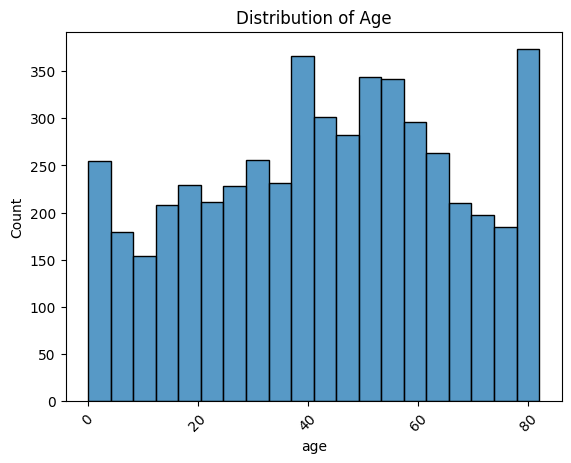

In [33]:
#Distribution of age
ax = sns.histplot(data = df, x ='age')
ax.ticklabel_format(style = 'plain');
ax.tick_params(axis = 'x', rotation = 45);
ax.set_title('Distribution of Age');

The persons of the age of 12 have the least count compared to other age groups

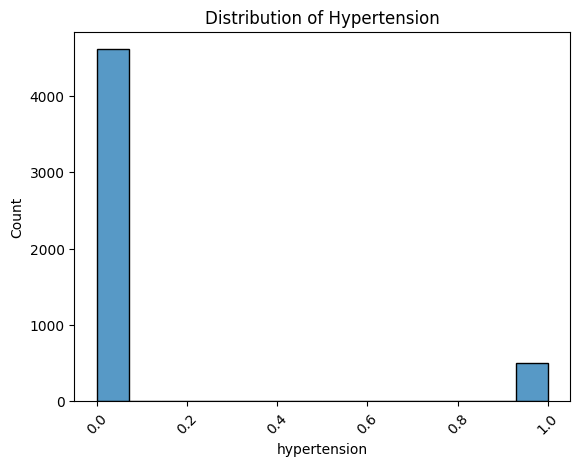

In [34]:
#Distribution of hypertension
ax = sns.histplot(data = df, x ='hypertension')
ax.ticklabel_format(style = 'plain');
ax.tick_params(axis = 'x', rotation = 45);
ax.set_title('Distribution of Hypertension');

There is a least number of people with hypertension

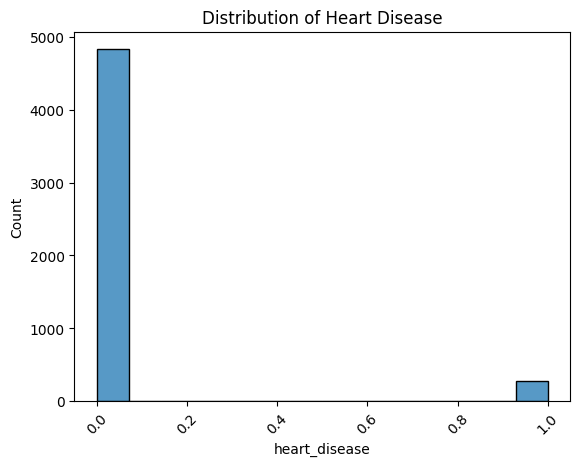

In [35]:
#Distribution of heart_disease
ax = sns.histplot(data = df, x ='heart_disease')
ax.ticklabel_format(style = 'plain');
ax.tick_params(axis = 'x', rotation = 45);
ax.set_title('Distribution of Heart Disease');

Majority of the people are not diagnosed with a heart disease

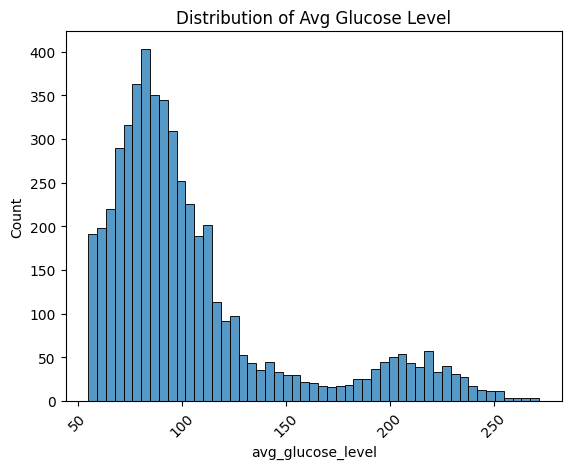

In [36]:
#Distribution of avg_glucose_level
ax = sns.histplot(data = df, x ='avg_glucose_level')
ax.ticklabel_format(style = 'plain');
ax.tick_params(axis = 'x', rotation = 45);
ax.set_title('Distribution of Avg Glucose Level');

The highest count of the avarage glucose level is between 50 and 100

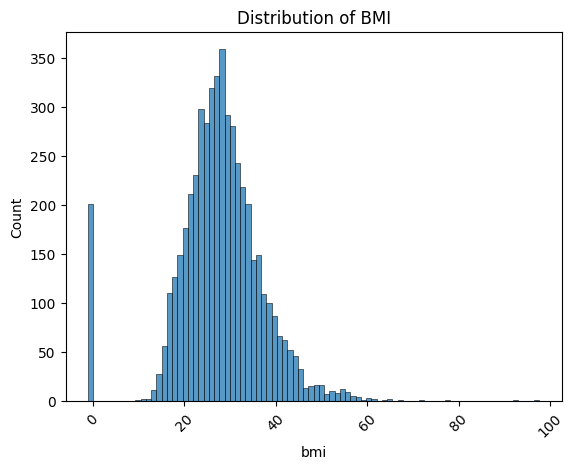

In [37]:
#Distribution of bmi
ax = sns.histplot(data = df, x ='bmi')
ax.ticklabel_format(style = 'plain');
ax.tick_params(axis = 'x', rotation = 45);
ax.set_title('Distribution of BMI');

28 has the hoghest count of BMI